In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [15]:
columns=['x','y']
dataset=pd.read_csv("data_lab1.txt",names=columns,sep=' ')
print(dataset.head())
print(dataset.shape)

          x         y
0  0.000000  0.685785
1  0.020202  1.671735
2  0.040404  2.406276
3  0.060606  0.375167
4  0.080808  4.355949
(100, 2)


Text(0, 0.5, 'y')

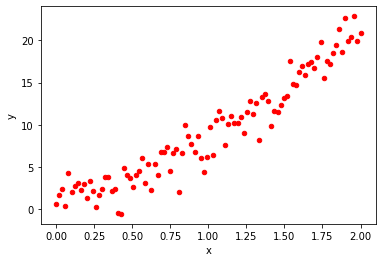

In [16]:
dataset.plot(kind='scatter',x='x',y='y',color='red')
plt.xlabel('x')
plt.ylabel('y')

In [17]:

x=np.asarray(dataset['x'])
y=np.asarray(dataset['y'])


In [18]:
train_size = int(0.7 * len(dataset))
Xtrain=x[:train_size]
Xtest=x[train_size:]
Xtrain=Xtrain.reshape(Xtrain.shape[0],1)
Xtest= Xtest.reshape(Xtest.shape[0], 1)


In [19]:
Ytrain=y[:train_size]
Ytest=y[train_size:]
Ytrain=Ytrain.reshape(Ytrain.shape[0],1)
Ytest= Ytest.reshape(Ytest.shape[0], 1)

In [20]:
bias = np.ones((70, 1))
Xbar = np.concatenate((bias, Xtrain), axis=1)


In [21]:
Theta=np.random.rand(2,1)
Theta.shape



(2, 1)

In [22]:
# Ytrain=np.dot(Xbar,Theta)


In [23]:
lr=0.001
threshold = 0.0001

In [24]:


def error(xbar,theta):
    erreur = 0.5*np.sum((np.dot(xbar,theta)-Ytrain)**2)
    # print(erreur)
    return erreur


In [25]:
# def grad(xbar,theta,y,i):
    
#     # np.sum(np.dot(Xbar,Theta)-y)
#     Xbar[i]
#     return 1 

<h1> BGD

In [26]:
errors = []

E = error(Xbar,Theta)
deltaE = 1000000
itera=0
while(deltaE>threshold):
    itera +=1
    # for n in range(0,1):
    #     for i in range(0,70):
    #         Theta = Theta-lr*grad(Xbar, Theta, Ytrain, i,n)
    Theta=Theta-lr*np.dot(Xbar.T,(np.dot(Xbar,Theta)-Ytrain))    
    Enew = error(Xbar, Theta)
    deltaE = abs(E-Enew)
    E= Enew
    errors.append(E)

plt.plot(errors)

<h1> SGD

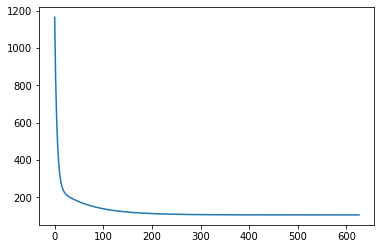

In [27]:
errors = []

E = error(Xbar, Theta)
deltaE = 1000000
itera=0
while(deltaE >threshold):
    itera+=1
    # stochastic gradient descent
    for i in range(0,70):
        Xi = Xbar[i,:].reshape(1,2)
        Yi = y[i]
        gradE = np.dot(Xi.T, (np.dot(Xi, Theta)-Yi))
        Theta = Theta - lr*gradE
    Enew = error(Xbar, Theta)
    deltaE = abs(Enew-E)
    E = Enew
    errors.append(E)

plt.plot(errors)



In [29]:
from numpy.linalg import inv 
Theta = np.dot(np.dot(inv(np.dot(Xbar.T,Xbar)),Xbar.T),Ytrain)


array([[0.18763866],
       [8.26760735]])